Exploratory data analysis of the census dataset.

The dataset was given as csv document, it contains the statistics of a mock census carried out in an imaginary modest town. It was randomly genarated by the python faker package and the entire data was generated in a similar manner to the 1881 census of the UK where in only a few questions were asked of the population. The fields that were recorded include:
1. Street Number ( Where '1' signifies unique dwelling)
2. Street Name
3. First Name of occupant
4. Surname of occupant 
5. Age of occcupant
6. Relationship to the head of the household (anyone over 18 can be a 'head'- they are simply the person who had the responsibilty to fill in the census details)
7. Marital status (one of: single, Married, Divorced, Widowed, or "NA" in the case of minors):
8. Gender (one of: Male, Female, the other responses were not implemented in 1881 )
9. Occupation (This field was implemented in a modern style, rather than typical 1881 occupations)
10. infirmity(limited sets of infirmities were implemented according to 1881 style)
11. Religion(Implementations of real world religions)

       The answers to the questions in the above fields were recorded, these fields constitute the columns of this dataset. The dataset originally has 11 columns and 10083 rows. The datatype of the above columns are all objects except the index column which contains the house numbers and has a int64 datatype.

DATA CLEANING

  Data cleaning helps in detecting and organizing data to make it uniform and ready for analysis.The data cleaning usually comes after the exploration of the dataset but data cleaning is never a one way process, as the analysis goes on,when irregularities are detected in the data, the data is cleaned at that point. In this report, we will be performing the exploratory analysis and cleaning of the data simultaeneously.
  The approach for the exploration is univariate analysis, that is, exploring each of the columns independently and for columns which are greatly dependent on other columns for extraction of reasonable patterns, bivariate and multi-variate analysis will be also employed.

Below, are the columns of the dataset and the data type of each column

In [7]:
# importing useful libraries 
import pandas as pd 
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 
import re


%matplotlib inline 

census = pd.read_csv(r'C:\Users\Laptop\Downloads\census.csv')

census

census.sample(20)

census.columns

census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10083 entries, 0 to 10082
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   10083 non-null  int64 
 1   Street                         10083 non-null  object
 2   First Name                     10083 non-null  object
 3   Surname                        10083 non-null  object
 4   Age                            10083 non-null  object
 5   Relationship to Head of House  10083 non-null  object
 6   Marital Status                 7526 non-null   object
 7   Gender                         10083 non-null  object
 8   Occupation                     10083 non-null  object
 9   Infirmity                      10083 non-null  object
 10  Religion                       7463 non-null   object
dtypes: int64(1), object(10)
memory usage: 866.6+ KB


The  Marital  status  column and the religion column contained null values. These null values were replaced with the 'none' string. During further analysis in  the subsequent section, individuals above 18 with the marital status,'none' will be filtered and their marital status  changed to single. Similarly, in the religion column there were four unusual entries namely 'Sith','House keeper','undecided' and 'Nope', it is clear that these entries were either entered as jokes or as mistakes, they were dropped from the dataset.

Outliers were detected in the Age column, they were detected visually using the box plots and statistically, using the IQR method. These outliers weren't removed because of the context and purpose of the analysis. Most of the unique values in the age column were in varrying decimal points. The values in the columns were rounded to single integers after the datatype of the column was converted to the float datatype.

## Plot of the Age column showing the outliers

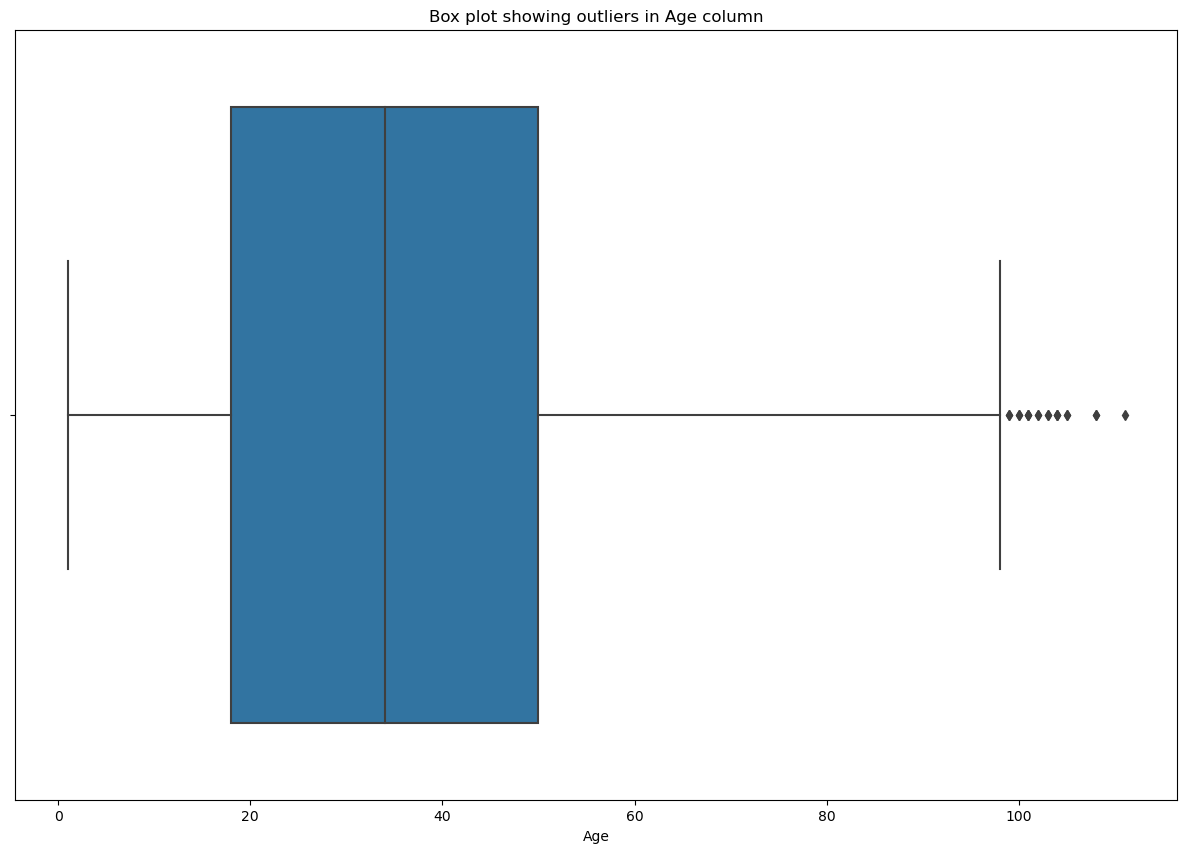

In [13]:
census = census[(census['Age'] !=' ') & (census['Age'] != 0)]

census["Age"] = census["Age"].astype("float64")
census["Age"] = census["Age"].round()
census['Age'] = census['Age'].astype('int64')
census = census[census['Age'] != 0]
# Detecting the outliers using boxplot
# Create a boxplot of the age column
plt.figure(figsize=(15,10))
plt.title('Box plot showing outliers in Age column')
sb.boxplot(x=census['Age'])

# Show the plot
plt.show()

## Outliers in the age column, using the IQR method


In [15]:
q1 = census["Age"].quantile(0.25)
q3 = census["Age"].quantile(0.75)
iqr = q3 - q1

# Define the lower and upper bounds for outliers using the IQR method
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify the outliers in the "age" column
outliers = census[(census["Age"] < lower_bound) | (census["Age"] > upper_bound)]
outliers_df = pd.DataFrame(outliers)

# Display the outliers
outliers_df

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
307,58,Andrews Avenue,Catherine,Griffin,102,Head,Widowed,Female,"Retired Editor, film/video",None,Christian
1709,59,O'Brien Gateway,Ricky,Thomas,101,Head,Married,Male,Retired Immunologist,None,Christian
1710,59,O'Brien Gateway,Vanessa,Thomas,104,Wife,Married,Female,Retired Garment/textile technologist,None,Methodist
1884,24,ExcaliburBells Heights,Samuel,Griffiths,100,Husband,Married,Male,Retired Electrical engineer,None,None
2341,56,Lightning Street,Carly,Mistry,104,Head,Married,Female,Retired Personal assistant,None,Christian
2342,56,Lightning Street,Malcolm,Mistry,105,Husband,Married,Male,Retired Intelligence analyst,None,None
4169,47,Shepherd Cove,Abbie,Scott,103,Head,Single,Female,Retired Film/video editor,None,None
4826,154,Shepherd Cove,Jodie,Daly,108,Head,Married,Female,Retired Minerals surveyor,None,Christian
4827,154,Shepherd Cove,Leslie,Daly,108,Husband,Married,Male,"Retired Designer, furniture",None,Christian
5913,167,September Street,Harry,James,99,Husband,Married,Male,Retired Chief of Staff,None,Christian


Bivariate analysis was introduced for the cleaning of the marital status column, ascertaining the validity of the entries in the column is dependent on some other columns such as the Age column. In the Marital status column, individuals under 18 mostly had none filled in, except two who were single and one aged 16 who was married. Further analysis of the column revealed that the individual who was married at 16 was a female student. According to Citizens Advice (2021), "In England, Wales and Northern Ireland, you can get married at 16 or 17 if you have parental consent. Otherwise, you have to wait until you are 18" (para. 1).
This column wasn't dropped on this basis. More cleaning was still done in the marital status column with regards the individuals that were widowed below certain age brackets. In a study published in the journal, Women and Ageing, the study demonstrates that widowhood can occur at any age and that the experience of being a widow is not limited to a specific age group(Kemp, C. L., & Lewis, J. (2010)). The rows where individuals that were widowed appeared too young weren't dropped.



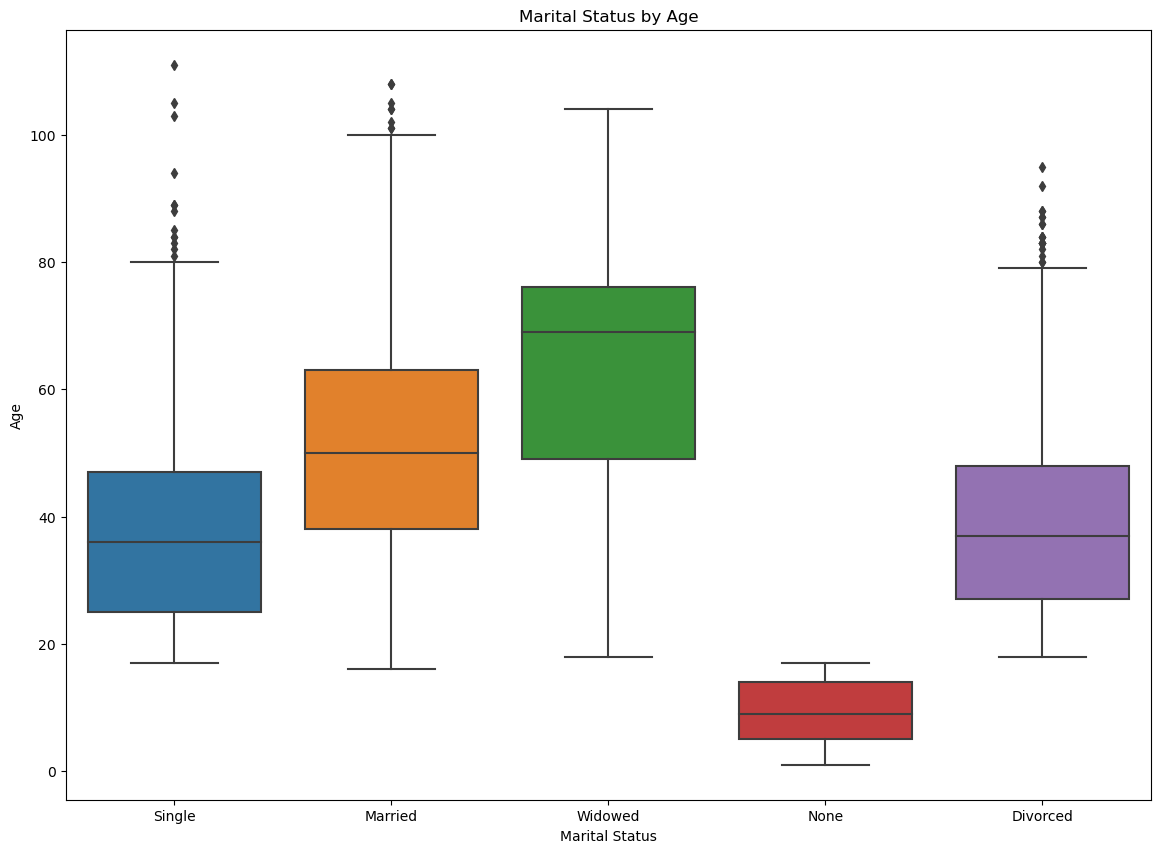

In [16]:
# Create a box plot of marital status
plt.figure(figsize=(14,10))
sb.boxplot(x='Marital Status', y='Age', data= census)
plt.title('Marital Status by Age')
plt.xlabel('Marital Status')
plt.ylabel('Age')
plt.show()

The occupation column had a lot of unique values so a simpler column was extracted for ease of analysis. The Employment status column was extracted from the occupation column. It had only five unique values,'Retired','unemployed','employed','university student' and student(child). The values described individuals who have retired, individuals who are unemployed, those who are employed, university stdents and students who are still children respectively. It was noted during the analysis that some individuals above 65 has entries of unemployed in their occupation column. According to Munnell and Sass (2018), "the UK government has been gradually increasing the state pension age for both men and women, with the aim of equalizing the retirement age. The book explains that the state pension age is currently 66 for both men and women born on or after April 6, 1954, and that it is gradually increasing for those born before that date." (p. XX). Based on that, the entries of the individuals above 65 were changed to 'Retired'

After the data was cleaned, the finalized census data had the following features

In [27]:
censuss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9938 entries, 0 to 9937
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   9938 non-null   int64 
 1   Street                         9938 non-null   object
 2   First Name                     9938 non-null   object
 3   Surname                        9938 non-null   object
 4   Age                            9938 non-null   int64 
 5   Relationship to Head of House  9938 non-null   object
 6   Marital Status                 9938 non-null   object
 7   Gender                         9938 non-null   object
 8   Occupation                     9938 non-null   object
 9   Infirmity                      9938 non-null   object
 10  Religion                       9938 non-null   object
 11  Age Band                       9938 non-null   object
 12  Address                        9938 non-null   object
 13  Hou

To aid the analysis, 5 additional columns were added to the dataset. They include:
    1. The age band : consists of age values placed into 5-year age bands for population pyramid
    2. Address: This helped in extracting the housing Id column
    3. House hold ID: Consists of unique identification of each household
    4. Household Occupancy: Consists of the number of individuals in a household
    5. Employment Status: The employment status of the individual, was extracted from the occupation column
    

Summary statistics

In [30]:
censuss.describe()

,House Number,Age,Household ID,Household Occupancy
count,9938.000000,9938.000000,9938.000000,9938.000000
mean,46.725297,35.169350,1525.947676,5.019119
std,52.967568,21.264797,920.630353,3.804897
min,1.000000,1.000000,0.000000,1.000000
25%,11.000000,18.000000,723.250000,3.000000
50%,25.000000,34.000000,1476.500000,4.000000
75%,56.000000,50.000000,2348.000000,5.000000
max,229.000000,111.000000,3102.000000,22.000000


## Population Pyramid

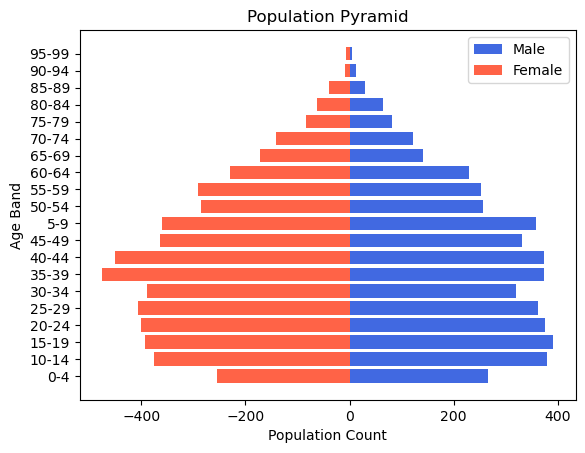

In [47]:
 #Create a new column called "ID" that combines "First Name", "Surname", and "Age"
censuss['ID'] = censuss['First Name'] + censuss['Surname'] + censuss['Age'].astype(str)

# Create a pivot table to group the data by gender and age band
pivot_table = pd.pivot_table(censuss, values='ID', index=['Age Band'], columns=['Gender'], aggfunc=pd.Series.nunique)
pivot_table = pivot_table.sort_index(ascending=True)

# Create the population pyramid

fig, ax = plt.subplots()
ax.barh(pivot_table.index, pivot_table['Male'], align='center', color='royalblue', label='Male')
ax.barh(pivot_table.index, -pivot_table['Female'], align='center', color='tomato', label='Female')
ax.set_xlabel('Population Count')
ax.set_ylabel('Age Band')
ax.set_title('Population Pyramid')
ax.legend()
plt.show()


Analysing the population pyramid, the structure of the population pyramid shows a slightly lower number of 
young people compared to middle-aged, especially those aged 0-4, suggesting a low birth rate. The 
population also tends to live well into old age, for both male and female. The individuals between the 35-39 age band have the highest density, meaning the individuals between 35 and 39 are the largest with a very good balance for the male and female.
it can be clearly inferred from the population pyramid that male and female individuals in this town are almost balanced with insignificant difference

# Further Analysis


Further examination of the population pyramid which clearly shows the age distribution and also shows a relative growth in the population. The width of the bottom bar shows an estimate of the the birth rate and the width of the top bar shows an estimate of the death rate. Comparing these two estimates, the bottom bar and the top bar, the population has a relative growth and there are more young people than retired aged people. The crude birth rate and death rate can be determined in further sections

The unemployment and employment chart below infers that higher percentage of unemployed individuals are the young people, but in comparison to the employment status of the entire town, there are more employed individuals than unemployed in the town.

## Employment and unemployment chart

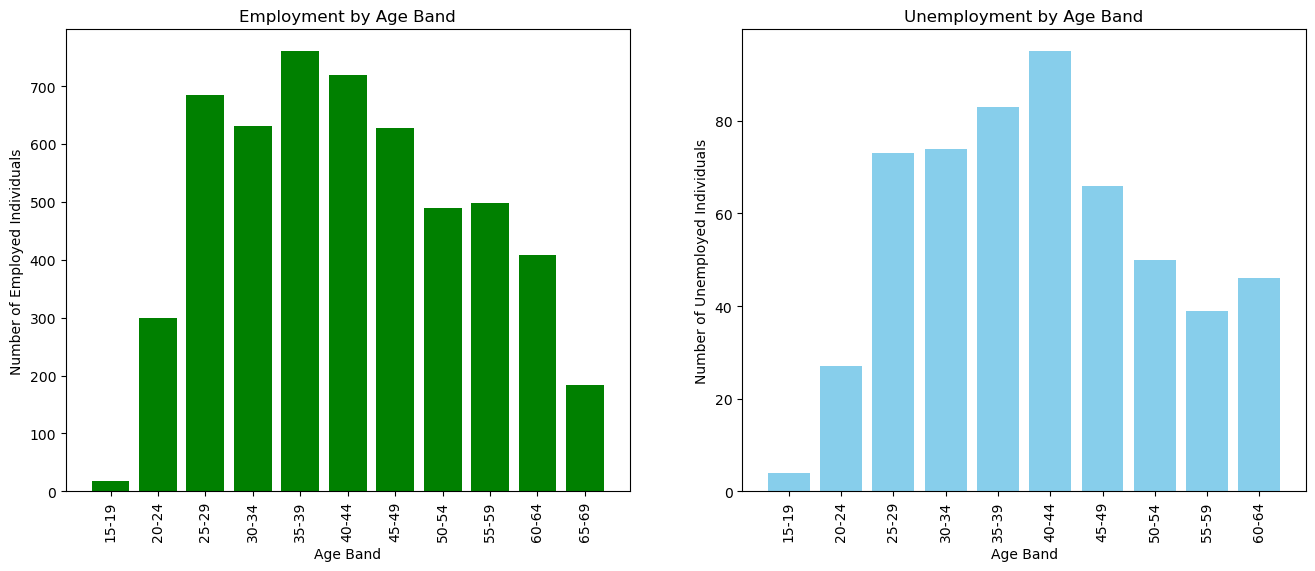

In [59]:
# Create a new dataframe for employed individuals
employed = censuss[censuss['Employment status'] == 'Employed']
employed_count = employed.groupby('Age Band')['Employment status'].count()

# Create a new dataframe for unemployed individuals
unemployed = censuss[censuss['Employment status'] == 'Unemployed']
unemployed_count = unemployed.groupby('Age Band')['Employment status'].count()

# Create subplots for both charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))

# Plot employed individuals
ax1.bar(employed_count.index, employed_count.values, color='green')
ax1.set_xlabel('Age Band')
ax1.set_ylabel('Number of Employed Individuals')
ax1.set_title('Employment by Age Band')

# Plot unemployed individuals
ax2.bar(unemployed_count.index, unemployed_count.values, color='skyblue')
ax2.set_xlabel('Age Band')
ax2.set_ylabel('Number of Unemployed Individuals')
ax2.set_title('Unemployment by Age Band')

# Rotate xticks in both subplots
for ax in (ax1, ax2):
    ax.tick_params(axis='x', labelrotation=90)

plt.show()


## Religious Affiliations

Analysing the religious affilations, most individuals have no religion and others who have, identify more as christians than other religions in the town. From the chart in the corresponding notebook, the jewish, sikh and muslim religion have very little population relatively. Christians being the largest among the individuals who have a religion is not unusual, according to the 2011 Census, the largest religious group in the UK was Christianity, accounting for approximately 59% of the population. The second largest religious group was Islam, accounting for approximately 5% of the population. Hinduism, Sikhism, Judaism, and Buddhism accounted for smaller proportions of the population, with each religion accounting for less than 1% of the population.
    Also, acccording to Voas and Crockett (2005), "Christianity is still the dominant religious tradition in Britain, and it continues to provide the principal cultural referent for most people, even those who no longer attend church" (p. 14) Voas explains that most people no longer identify with a religion but those who do, are majorly christians, this was clearly seen in this analysis.

## Marriage and divorce rate

Examining the divorce and marriage rate, male and female individuals between the ages of 95-99 had the highest percentage for marraige rate while males between 25 and 19 and females between 35 and 39 had the highest percentage of divorce rates.
According to a study by Kuhn and Lagemann (2019), the impact of divorce rates on housing can have significant economic implications. They found that divorce not only affects the housing market through the decrease in demand for housing, but it also impacts household finances and stability, which can lead to long-term economic consequences. Generally, in this town the marriage rates are higher than the divorce rates. The computation was done in the corresponding notebook.

## Occupancy Level


Analysing the occupancy level of the town, most households had maximum of 5 individuals living in the dwelling and about 20 households had 22 individuals living in them. However, There is no specific recommended occupancy level for the UK as it varies depending on factors such as the type of dwelling, the number of bedrooms, and the age and relationship of the occupants. However, there are some general guidelines and regulations that aim to ensure a minimum level of living space and amenities for occupants, such as the Housing Health and Safety Rating System (HHSRS) and the Decent Homes Standard. These standards set out criteria for issues such as overcrowding, minimum room sizes, and access to basic amenities such as heating, hot water, and sanitation.


## Commuters

Commuters simply envelope people that move around the town or move to another town to carry out their activities regularly, it could be weekly or daily. Certian professionals are likely to commute. "Higher skilled occupations are generally associated with longer commuting distances, particularly professional and managerial occupations, while routine and manual occupations are associated with shorter distances and a greater reliance on local job opportunities" (Morris & Catney, 2018, p. 55). These individuals include Doctors, Nurses,Teachers, Engineers,etc. Some non professionals, too such as sales Personnels, Market officers, construction workers and other occupations where the individuals are likely to move from place to place regularly. The occupation column was examined and the rows that contained this occupations were extracted. The university students are all commuters because there is no university in the town. These rows were extracted differently then concatenated to get the total value of commuters. In relation to the total population of the town, 16% of the towns population commute.

## Infirmity

Only 0.7% of the towns population have infirmities.


## Recommendations

Given the high marriage rate and occupancy rate, there is need to invest in high density houses. High marriage rate positively impacts housing, the need for more houses will greatly arise as the marriage continues to increase. Similarly, considering that 16% of the towns poplulation are commuters, a train station willl definitely take pressure off the road. These validate the need to potentially invest in high density houses and train stations. Religious buildings are not necessary because over 50% of the towns population do not identify with any religion.

Given the relatively fair rate of unemployment in the town, investing in re-training people for new skills is not priority, one the other hand a great density of the population lies in the middle aged population, this shows the arising need for old age care as they will be greatly needed in few years. The increasing numbers of the potentially retired people validates the need for potential investment in old age care


Increase in spending for schooling is also warranted because the population of school aged children, the growing population of the school aged chidren validates the need for potential investment in schooling. Also, the fact that there is no university in the town is also brought into view, there is great need for a university in the town because of the growing population of the school aged children. Moreso, a very insignificant percentage of the population suffer from infirmities, this gives emergency health centres less priorities



Biblography:

(Citizens Advice, 2021)."Minimum age to get married," Citizens Advice, last updated June 2021, https://www.citizensadvice.org.uk/family/living-together-marriage-and-civil-partnership/getting-married/minimum-age-to-get-married/

Kemp, C. L., & Lewis, J. (2010). The experience of widowhood: Older women's voices. Journal of Women & Aging, 22(3), 175-192. https://doi.org/10.1080/08952841.2010.481824

Office for National Statistics. (2012). 2011 Census: Key Statistics for Local Authorities in England and Wales. Retrieved from https://www.ons.gov.uk/file?uri=/census/2011census/keystatistics/localauthoritiesinenglandandwales/2013-01-30/ks209ewl.xls

Voas, D., & Crockett, A. (2005). Religion in Britain: Neither Believing nor Belonging. Sociology, 39(1), 11-28.

Kuhn, R., & Lagemann, E. (2019). The “Decline” of Education Schools: Its Significance for Educational Reform. Educational Researcher, 48(4), 191-203. doi: 10.3102/0013189X19835178

Morris, E. A., & Catney, P. (2018). Commuting and occupational structure in the UK: 1971 to 2011. Journal of Transport Geography, 66, 54-62.